In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv("car_fuel_efficiency.csv")
df = df[['engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg']]

df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


Matplotlib is building the font cache; this may take a moment.


<Axes: >

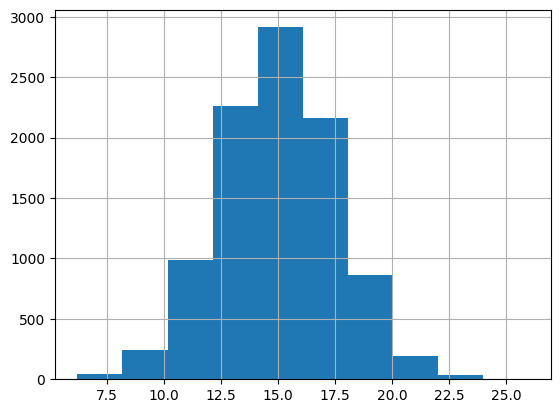

In [ ]:
#Look at the fuel_efficiency_mpg variable. Does it have a long tail?
df['fuel_efficiency_mpg'].hist()

## No, it does not have a long tail.

In [6]:
# q1: here's one column with missing values. What is it?
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [7]:
# q2: What's the median (50% percentile) for variable 'horsepower'?
df['horsepower'].median()

np.float64(149.0)

In [ ]:
# Prepare and split the dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

# Split data
X = df.drop('fuel_efficiency_mpg', axis=1)
y = df['fuel_efficiency_mpg']

# 60/20/20 split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True)

# --- OPTION 1: Fill missing with 0 ---
X_train_0 = X_train.fillna({'horsepower': 0})
X_val_0   = X_val.fillna({'horsepower': 0})
# print(X_train_0.isnull().sum())
model_0 = LinearRegression()
model_0.fit(X_train_0, y_train)

y_val_pred_0 = model_0.predict(X_val_0)
rmse_0 = root_mean_squared_error(y_val, y_val_pred_0)
rmse_0 = round(rmse_0, 2)


# --- OPTION 2: Fill missing with mean (computed from training only) ---
horse_power_mean = X_train['horsepower'].mean()

X_train_mean = X_train.fillna({'horsepower': horse_power_mean})
X_val_mean   = X_val.fillna({'horsepower': horse_power_mean})

model_mean = LinearRegression()
model_mean.fit(X_train_mean, y_train)

y_val_pred_mean = model_mean.predict(X_val_mean)
rmse_mean = root_mean_squared_error(y_val, y_val_pred_mean)
rmse_mean = round(rmse_mean, 2)

# --- Compare results ---
print(f"RMSE (fill 0): {rmse_0}")
print(f"RMSE (fill mean): {rmse_mean}")

if rmse_mean < rmse_0:
    print("Filling with MEAN gives better RMSE.")
else:
    print("Filling with 0 gives better RMSE.")


RMSE (fill 0): 0.52
RMSE (fill mean): 0.46
✅ Filling with MEAN gives better RMSE.


In [ ]:
# Now let's train a regularized linear regression.
# For this question, fill the NAs with 0.
# Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
# Use RMSE to evaluate the model on the validation dataset.
# Round the RMSE scores to 2 decimal digits.
# Which r gives the best RMSE?
from sklearn.linear_model import Ridge


X_train = X_train_0 
X_val = X_val_0

# Regularization values
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_scores = {}

for r in r_values:
    model = Ridge(alpha=r)  # alpha = regularization strength
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred)
    rmse_scores[r] = round(rmse, 2)

# Print results
for r, score in rmse_scores.items():
    print(f"r = {r}: RMSE = {score}")

# Find best r
best_r = min(rmse_scores, key=rmse_scores.get)
print(f"\nBest RMSE achieved with r = {best_r}")


r = 0: RMSE = 0.52
r = 0.01: RMSE = 0.52
r = 0.1: RMSE = 0.52
r = 1: RMSE = 0.52
r = 5: RMSE = 0.52
r = 10: RMSE = 0.52
r = 100: RMSE = 0.52

✅ Best RMSE achieved with r = 0


In [15]:
# We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
# Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
# For each seed, do the train/validation/test split with 60%/20%/20% distribution.
# Fill the missing values with 0 and train a model without regularization.
# For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
# What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
# Round the result to 3 decimal digits (round(std, 3))
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

for seed in seeds:
    # Split with this seed
    X = df.drop('fuel_efficiency_mpg', axis=1)
    y = df['fuel_efficiency_mpg']
    
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=seed, shuffle=True)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=seed, shuffle=True)

    # Fill missing horse_power with 0
    X_train = X_train.fillna({'horsepower': 0})
    X_val = X_val.fillna({'horsepower': 0})

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Validate
    y_val_pred = model.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_val_pred)
    rmse_scores.append(rmse)

# Compute standard deviation
std_rmse = round(np.std(rmse_scores), 3)

print("RMSE scores for each seed:", [round(r, 2) for r in rmse_scores])
print("Standard deviation of RMSEs:", std_rmse)

RMSE scores for each seed: [0.52, 0.52, 0.52, 0.52, 0.51, 0.52, 0.51, 0.54, 0.52, 0.52]
Standard deviation of RMSEs: 0.006


In [ ]:
# Features & target
X = df.drop('fuel_efficiency_mpg', axis=1)
y = df['fuel_efficiency_mpg']

# Step 1: Split using seed 9
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=9, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=9, shuffle=True)

# Step 2: Combine train + validation
X_combined = pd.concat([X_train, X_val])
y_combined = pd.concat([y_train, y_val])

# Step 3: Fill missing values with 0
X_combined = X_combined.fillna({'horsepower': 0})
X_test = X_test.fillna({'horsepower': 0})

# Step 4: Train Ridge model (r = 0.001)
model = Ridge(alpha=0.001)
model.fit(X_combined, y_combined)

# Step 5: Evaluate on test set
y_test_pred = model.predict(X_test)
rmse_test = root_mean_squared_error(y_test, y_test_pred)
rmse_test = round(rmse_test, 2)

print(f"RMSE on test dataset: {rmse_test}")


✅ RMSE on test dataset: 0.52
